In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.



#added quantile in n
# 11 added quantile 

/kaggle/input/mh-patient-drug-switch-prediction/DS_ML_Recruitment_V2.0/Sample Submission.csv
/kaggle/input/mh-patient-drug-switch-prediction/DS_ML_Recruitment_V2.0/test_data.csv
/kaggle/input/mh-patient-drug-switch-prediction/DS_ML_Recruitment_V2.0/train_data.csv
/kaggle/input/mh-patient-drug-switch-prediction/DS_ML_Recruitment_V2.0/train_labels.csv
/kaggle/input/mh-patient-drug-switch-prediction/DS_ML_Recruitment_V2.0/fitness_values_2.csv
/kaggle/input/mh-patient-drug-switch-prediction/DS_ML_Recruitment_V2.0/_DS_Store


In [2]:
train = pd.read_csv('/kaggle/input/mh-patient-drug-switch-prediction/DS_ML_Recruitment_V2.0/train_data.csv')
test = pd.read_csv('/kaggle/input/mh-patient-drug-switch-prediction/DS_ML_Recruitment_V2.0/test_data.csv')
# ftns = pd.read_csv('/kaggle/input/mh-patient-drug-switch-prediction/Drug_Switch_Prediction_ParticipantsData/fitness_values.csv')
labels = pd.read_csv('/kaggle/input/mh-patient-drug-switch-prediction/DS_ML_Recruitment_V2.0/train_labels.csv')
s = pd.read_csv('/kaggle/input/mh-patient-drug-switch-prediction/DS_ML_Recruitment_V2.0/Sample Submission.csv')

In [3]:
imp_events=train['event_name'].value_counts().keys()
imp_speciality=train['specialty'].value_counts().keys()

In [4]:
id_var = 'patient_id'
time_var='event_time'

In [5]:
train=train[~train.duplicated()]

In [6]:
c=['count','nunique']
n=['mean','max','min','sum','median', 'std']
agg_col={'event_name':c,'event_time':n,'specialty':c,'plan_type':['count'],'patient_payment':n}


In [7]:
train1=train.groupby('patient_id').agg(agg_col)
train=train[['patient_id', 'event_name', 'event_time', 'specialty', 'plan_type','patient_payment']]
train1.columns=['P_' + '_'.join(col).strip() for col in train1.columns.values]
train1.reset_index(inplace=True)
train1.head()

,patient_id,P_event_name_count,P_event_name_nunique,P_event_time_mean,P_event_time_max,P_event_time_min,P_event_time_sum,P_event_time_median,P_event_time_std,P_specialty_count,P_specialty_nunique,P_plan_type_count,P_patient_payment_mean,P_patient_payment_max,P_patient_payment_min,P_patient_payment_sum,P_patient_payment_median,P_patient_payment_std
0,patient_1,540,75,500.720370,1079,12,270389,476.0,304.401340,540,9,540,0.590702,20.1,0.0,318.979048,0.0,2.043002
1,patient_10,807,98,496.765799,1079,2,400890,472.0,284.923181,807,17,807,13.476063,275.0,0.0,10875.182500,0.0,31.789995
2,patient_100,799,67,614.191489,1077,6,490739,692.0,269.142879,799,8,799,0.635726,222.0,0.0,507.944746,0.0,7.989606
3,patient_1000,660,88,474.393939,1079,9,313100,452.0,296.391493,660,14,660,9.606381,250.0,0.0,6340.211612,0.0,25.772332
4,patient_10000,468,71,602.940171,1079,11,282176,647.0,312.744809,468,12,468,1.119812,30.0,0.0,524.071905,0.0,4.625619


In [8]:
test1=test.groupby('patient_id').agg(agg_col)
test=test[['patient_id', 'event_name', 'event_time', 'specialty', 'plan_type','patient_payment']]
test1.columns=['P_' + '_'.join(col).strip() for col in test1.columns.values]
test1.reset_index(inplace=True)
test1.head()

,patient_id,P_event_name_count,P_event_name_nunique,P_event_time_mean,P_event_time_max,P_event_time_min,P_event_time_sum,P_event_time_median,P_event_time_std,P_specialty_count,P_specialty_nunique,P_plan_type_count,P_patient_payment_mean,P_patient_payment_max,P_patient_payment_min,P_patient_payment_sum,P_patient_payment_median,P_patient_payment_std
0,patient_10002,1045,63,630.802871,1078,7,659189,645.0,335.398121,1045,9,1045,10.557952,330.000,0.0,11033.059643,0.0,24.274691
1,patient_10003,812,87,572.399015,1074,2,464788,588.0,321.167681,812,11,812,2.209372,300.000,0.0,1794.010238,0.0,13.309843
2,patient_10004,600,51,504.281667,1079,7,302569,494.0,284.266714,600,6,600,5.117916,1290.675,0.0,3070.749615,0.0,53.952676
3,patient_10006,563,51,601.658970,1051,6,338734,607.0,247.193970,563,8,563,3.685765,210.000,0.0,2075.085714,0.0,13.984023
4,patient_10011,372,37,551.448925,1063,7,205139,572.0,303.393778,372,7,372,8.442560,50.000,0.0,3140.632222,2.0,14.892698


In [9]:
train1=train1.merge(labels,on=['patient_id'])
train1.head()

,patient_id,P_event_name_count,P_event_name_nunique,P_event_time_mean,P_event_time_max,P_event_time_min,P_event_time_sum,P_event_time_median,P_event_time_std,P_specialty_count,P_specialty_nunique,P_plan_type_count,P_patient_payment_mean,P_patient_payment_max,P_patient_payment_min,P_patient_payment_sum,P_patient_payment_median,P_patient_payment_std,outcome_flag
0,patient_1,540,75,500.720370,1079,12,270389,476.0,304.401340,540,9,540,0.590702,20.1,0.0,318.979048,0.0,2.043002,0
1,patient_10,807,98,496.765799,1079,2,400890,472.0,284.923181,807,17,807,13.476063,275.0,0.0,10875.182500,0.0,31.789995,1
2,patient_100,799,67,614.191489,1077,6,490739,692.0,269.142879,799,8,799,0.635726,222.0,0.0,507.944746,0.0,7.989606,0
3,patient_1000,660,88,474.393939,1079,9,313100,452.0,296.391493,660,14,660,9.606381,250.0,0.0,6340.211612,0.0,25.772332,0
4,patient_10000,468,71,602.940171,1079,11,282176,647.0,312.744809,468,12,468,1.119812,30.0,0.0,524.071905,0.0,4.625619,0


In [10]:
df=train1.append(test1,ignore_index=True)
df.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,P_event_name_count,P_event_name_nunique,P_event_time_max,P_event_time_mean,P_event_time_median,P_event_time_min,P_event_time_std,P_event_time_sum,P_patient_payment_max,P_patient_payment_mean,P_patient_payment_median,P_patient_payment_min,P_patient_payment_std,P_patient_payment_sum,P_plan_type_count,P_specialty_count,P_specialty_nunique,outcome_flag,patient_id
0,540,75,1079,500.720370,476.0,12,304.401340,270389,20.1,0.590702,0.0,0.0,2.043002,318.979048,540,540,9,0.0,patient_1
1,807,98,1079,496.765799,472.0,2,284.923181,400890,275.0,13.476063,0.0,0.0,31.789995,10875.182500,807,807,17,1.0,patient_10
2,799,67,1077,614.191489,692.0,6,269.142879,490739,222.0,0.635726,0.0,0.0,7.989606,507.944746,799,799,8,0.0,patient_100
3,660,88,1079,474.393939,452.0,9,296.391493,313100,250.0,9.606381,0.0,0.0,25.772332,6340.211612,660,660,14,0.0,patient_1000
4,468,71,1079,602.940171,647.0,11,312.744809,282176,30.0,1.119812,0.0,0.0,4.625619,524.071905,468,468,12,0.0,patient_10000


In [11]:
df_train=df[df['outcome_flag'].isnull()==False].copy()
df_test=df[df['outcome_flag'].isnull()==True].copy()

print(df_train.shape,df_test.shape)

(16683, 19) (7148, 19)


In [12]:
from tqdm import tqdm_notebook as tqdm
col={'event_name':imp_events,'specialty':imp_speciality,'plan_type':train['plan_type'].unique()}  
for k in col.keys():
    _data=train[[k,'patient_id', 'event_time','patient_payment']].groupby(['patient_id',k]).agg({'event_time':['min','max','std','mean'],'patient_payment':['mean','max','min','sum', 'std','quantile']})
    _data.columns=['MM_' + '_'.join(col).strip() for col in _data.columns.values]
    _data=_data.reset_index()
    for j in tqdm(col[k]):
        patient_level_feature=_data[_data[k]==j].drop([k],axis=1)
        patient_level_feature.columns = ['patient_id']+[x+'_'+j for x in patient_level_feature.columns if x not in ['patient_id']]
        df_train=df_train.merge(patient_level_feature,on=['patient_id'],how='left')


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


In [13]:
from tqdm import tqdm_notebook as tqdm

col={'event_name':imp_events,'specialty':imp_speciality,'plan_type':test['plan_type'].unique()}  
for k in col.keys():
    _data=test[[k,'patient_id', 'event_time','patient_payment']].groupby(['patient_id',k]).agg({'event_time':['min','max','std','mean'],'patient_payment':['mean','max','min','sum', 'std'
    ,'quantile']})
    _data.columns=['MM_' + '_'.join(col).strip() for col in _data.columns.values]
    _data=_data.reset_index()
    for j in tqdm(col[k]):
        patient_level_feature=_data[_data[k]==j].drop([k],axis=1)
        patient_level_feature.columns = ['patient_id']+[x+'_'+j for x in patient_level_feature.columns if x not in ['patient_id']]
        df_test=df_test.merge(patient_level_feature,on=['patient_id'],how='left')


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


In [14]:
from catboost import CatBoostClassifier,Pool, cv
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score

In [15]:
col_to_drop=['patient_id','outcome_flag']
X,y=df_train.drop(col_to_drop,axis=1),df_train['outcome_flag']
Xtest=df_test.drop(col_to_drop,axis=1)

In [16]:
print(X.shape,Xtest.shape)
X=X.replace([np.nan,np.inf],0)
Xtest=Xtest.replace([np.nan,np.inf],0)
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state = 1994,stratify=y)

(16683, 7567) (7148, 7567)


In [17]:
# m=LGBMClassifier(n_estimators=1500,random_state=1994,learning_rate=0.03,objective='binary',subsample_for_bin=200000,subsample=0.9,reg_alpha=10,reg_lambda=50)
m=LGBMClassifier(n_estimators=2500,random_state=1994,learning_rate=0.02,objective='binary',nthread= 3,scale_pos_weight=1,num_leaves=20,min_split_gain=0.3,
                 subsample_for_bin=20000,subsample=0.9,reg_alpha=10,reg_lambda=50,colsample_bytree=0.5)
# m=RidgeCV(cv=4)
m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_val, y_val.values)],eval_metric='auc', early_stopping_rounds=200,verbose=200)
p=m.predict_proba(X_val)[:,-1]

print(roc_auc_score(y_val,p))

Training until validation scores don't improve for 200 rounds
[200]	training's auc: 0.877983	training's binary_logloss: 0.303428	valid_1's auc: 0.809895	valid_1's binary_logloss: 0.338895
[400]	training's auc: 0.920139	training's binary_logloss: 0.264599	valid_1's auc: 0.825287	valid_1's binary_logloss: 0.326384
[600]	training's auc: 0.944509	training's binary_logloss: 0.237783	valid_1's auc: 0.832049	valid_1's binary_logloss: 0.320468
[800]	training's auc: 0.960055	training's binary_logloss: 0.217436	valid_1's auc: 0.835514	valid_1's binary_logloss: 0.317322
[1000]	training's auc: 0.970043	training's binary_logloss: 0.201803	valid_1's auc: 0.837247	valid_1's binary_logloss: 0.315626
[1200]	training's auc: 0.975467	training's binary_logloss: 0.191158	valid_1's auc: 0.83887	valid_1's binary_logloss: 0.314225
[1400]	training's auc: 0.975653	training's binary_logloss: 0.190724	valid_1's auc: 0.838951	valid_1's binary_logloss: 0.314197
Early stopping, best iteration is:
[1207]	training's a

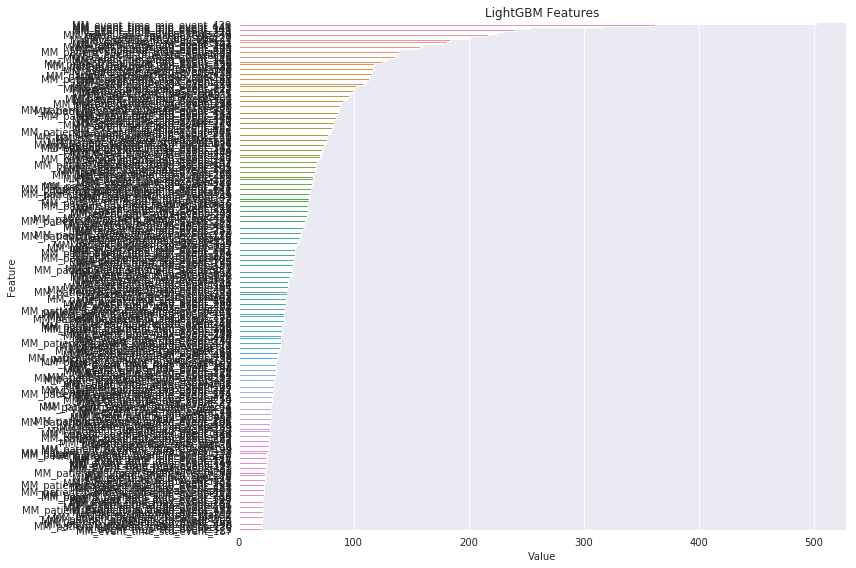

In [18]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

%matplotlib inline
feature_imp = pd.DataFrame(sorted(zip(m.feature_importances_, X.columns), reverse=True)[:300], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12,8))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [19]:
err=[]
feature_importance_df = pd.DataFrame()
y_pred_tot=[]
test_p=[]
train_p=[]
from sklearn.model_selection import KFold,StratifiedKFold
fold=StratifiedKFold(n_splits=15,shuffle=True,random_state=1994) #15 is best
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m=LGBMClassifier(n_estimators=4500,random_state=1994,learning_rate=0.02,objective='binary',nthread= 3,scale_pos_weight=1,num_leaves=20,min_split_gain=0.3,
                 subsample_for_bin=20000,subsample=0.9,reg_alpha=10,reg_lambda=50,colsample_bytree=0.5)
    m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)],eval_metric='auc', early_stopping_rounds=200,verbose=200)
    
    preds=m.predict_proba(X_test,num_iteration=m.best_iteration_)[:,-1]
#     tpreds=m.predict_proba(X_train,num_iteration=m.best_iteration_)[:,-1]
    
    print("err: ",roc_auc_score(y_test,preds))
    err.append(roc_auc_score(y_test,preds))
#     train_p.append(tpreds)
#     test_p.append(preds)
    p = m.predict_proba(Xtest)[:,-1]
    i=i+1
    y_pred_tot.append(p)

Training until validation scores don't improve for 200 rounds
[200]	training's auc: 0.872038	training's binary_logloss: 0.306281	valid_1's auc: 0.811919	valid_1's binary_logloss: 0.336417
[400]	training's auc: 0.909217	training's binary_logloss: 0.270802	valid_1's auc: 0.828915	valid_1's binary_logloss: 0.322402
[600]	training's auc: 0.933199	training's binary_logloss: 0.246157	valid_1's auc: 0.838755	valid_1's binary_logloss: 0.315102
[800]	training's auc: 0.950124	training's binary_logloss: 0.226643	valid_1's auc: 0.843151	valid_1's binary_logloss: 0.311978
[1000]	training's auc: 0.961684	training's binary_logloss: 0.210886	valid_1's auc: 0.845879	valid_1's binary_logloss: 0.309481
[1200]	training's auc: 0.969227	training's binary_logloss: 0.198443	valid_1's auc: 0.847651	valid_1's binary_logloss: 0.307587
[1400]	training's auc: 0.973428	training's binary_logloss: 0.190162	valid_1's auc: 0.848774	valid_1's binary_logloss: 0.306373
[1600]	training's auc: 0.973482	training's binary_log

In [20]:
np.mean(err)

0.8464034168447472

In [21]:

df_test['outcome_flag']=np.mean(y_pred_tot,0)
# df_test['outcome_flag']=np.mean(y_pred_tot,0)
df_test.head()

,P_event_name_count,P_event_name_nunique,P_event_time_max,P_event_time_mean,P_event_time_median,P_event_time_min,P_event_time_std,P_event_time_sum,P_patient_payment_max,P_patient_payment_mean,...,MM_event_time_min_plan_6,MM_event_time_max_plan_6,MM_event_time_std_plan_6,MM_event_time_mean_plan_6,MM_patient_payment_mean_plan_6,MM_patient_payment_max_plan_6,MM_patient_payment_min_plan_6,MM_patient_payment_sum_plan_6,MM_patient_payment_std_plan_6,MM_patient_payment_quantile_plan_6
0,1045,63,1078,630.802871,645.0,7,335.398121,659189,330.000,10.557952,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,812,87,1074,572.399015,588.0,2,321.167681,464788,300.000,2.209372,...,2.0,1074.0,320.214178,558.685897,11.500066,300.0,0.0,1794.010238,28.624670,0.000000
2,600,51,1079,504.281667,494.0,7,284.266714,302569,1290.675,5.117916,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,563,51,1051,601.658970,607.0,6,247.193970,338734,210.000,3.685765,...,6.0,1027.0,233.652584,359.909091,15.152814,210.0,0.0,1000.085714,29.876643,2.678571
4,372,37,1063,551.448925,572.0,7,303.393778,205139,50.000,8.442560,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_test[['patient_id','outcome_flag']].to_excel('MH-ZS_fork_ss15_lgb.xlsx',index=False)